In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('T1D_GWAS_add.tsv', sep='\t')

Text(0.5, 0.98, 'GWAS Plot showing Association between SNPs in T1DM')

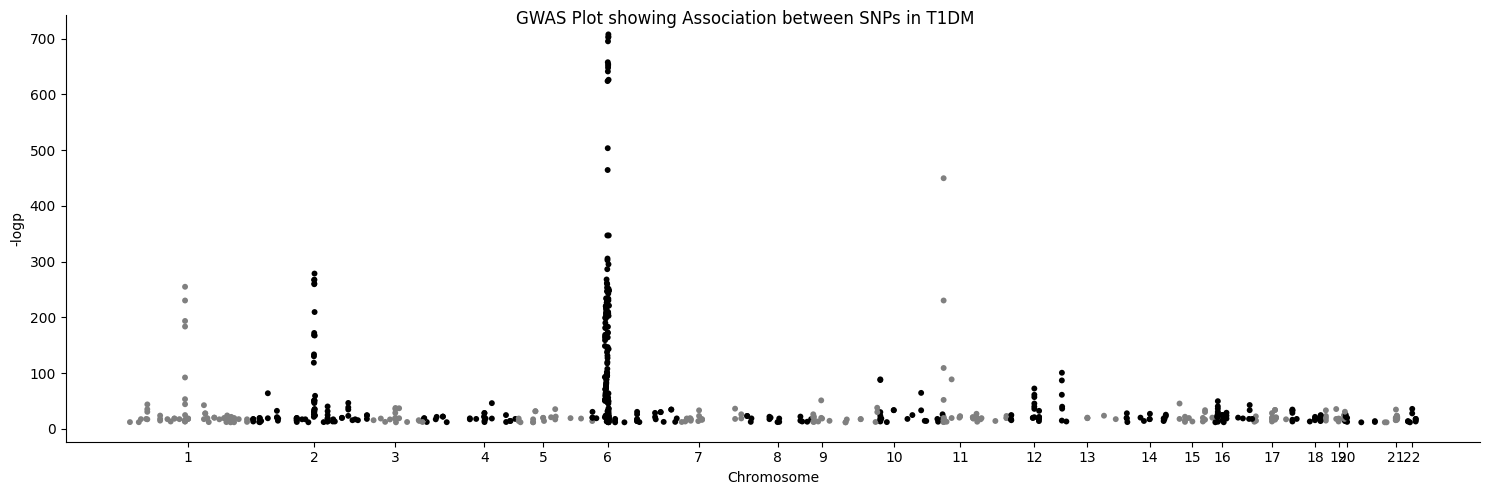

In [3]:
import seaborn as sns
%matplotlib inline

my_data = df.sample(642)

g=sns.relplot(
    data = my_data, # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 3, # size of graph
    hue = 'CHR_ID', # for whole genome this is the chromosome
    palette= ['grey','black'] * 11, #random colour scheme, can be changed to any colour(s)
    linewidth=0,
    size=4,
    legend=None
)

# Editing x-axis and making it neater
g.ax.set_xlabel('Chromosome') # x-axis label

# Setting where the labels in the x-axis should be
g.ax.set_xticks(df.groupby('CHR_ID')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR_ID'].unique())


# Add title to graph
g.fig.suptitle('GWAS Plot showing Association between SNPs in T1DM')

# Create annotations for each SNP point
#annotations = my_data[my_data['-logp'] > 20].apply(lambda p : g.ax.annotate(p['SNPS'], (p['cumulative_pos'], p['-logp'])), axis=1).to_list()

#adjust_text(annotations, arrowprops = {'arrowstyle': '->', 'color':'blue'})